<a href="https://colab.research.google.com/github/songiangvn/Continuous-blood-pressure-monitoring/blob/main/ML%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import csv
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


# Load Data

In [ ]:
dataset = pd.read_csv(
    "/content/drive/MyDrive/DataUROP/cleaned_further.csv",
    names=[
        "alpha","PIR","ptt","bpmax","bpmin","hrfinal","ih","il","meu","j","k","l","m","n","o","p","q","r","s",
    ],
)

# input features
X = dataset[
    [
        "alpha","PIR","ptt","hrfinal","ih","il","meu","j","k","l","m","n","o","p","q","r","s",
    ]
]

# output
y = dataset[["bpmin", "bpmax"]]
# print(y)

sbp = list()
dbp = list()

real_BP = list()
with open("/content/drive/MyDrive/DataUROP/cleaned_further.csv", "r") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=",")
    # print(csv_reader)
    for row in csv_reader:
        # ptt.append(float(row[2]))
        # print(row)
        sbp.append(float(row[3]))  # real sbp ~ bpmax
        dbp.append(float(row[4]))  # real dbp ~ bpmin

    real_BP = list()
    for i in range(len(sbp)):
        BP_actual = (2 * dbp[i] + sbp[i]) / 3
        real_BP.append(BP_actual)



In [ ]:
# Data split
# Add K-fold Cross Validation -> 5 fold cross validation
seed = 2024
X_train, X_test, y_train, y_test = train_test_split(
    X, real_BP, test_size=0.15, random_state=seed
)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X)
y_train = real_BP
x_test = sc_X.transform(X_test)

# BaseLine Model Comparison

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.ensemble import VotingRegressor -> check this later

In [ ]:
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=500, random_state=seed),
    Ridge(alpha=1.0),
    SVR(kernel="rbf"),
    SVR(kernel="linear"),
    # XGBRegressor(),
    DecisionTreeRegressor(max_depth=4),
    AdaBoostRegressor(
        DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=seed
    ),
    GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        random_state=seed,
    ),
]

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold


def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # print(metrics)
    kfold = KFold(n_splits=cv, random_state=seed, shuffle=True)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_idx", metrics])
    if plot_results:
        sns.boxplot(x="model_name", y=metrics, data=cv_df, color="lightblue", showmeans=True)
        plt.title("Boxplot of Base-Line Model using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()

    mean = cv_df.groupby("model_name")[metrics].mean()
    std = cv_df.groupby("model_name")[metrics].std()
    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ["mean", "std"]
    baseline_results.sort_values(by=["mean"], ascending=False, inplace=True)
    #print(baseline_results)
    #baseline_results.to_csv("baseline_results.csv")
    return baseline_results


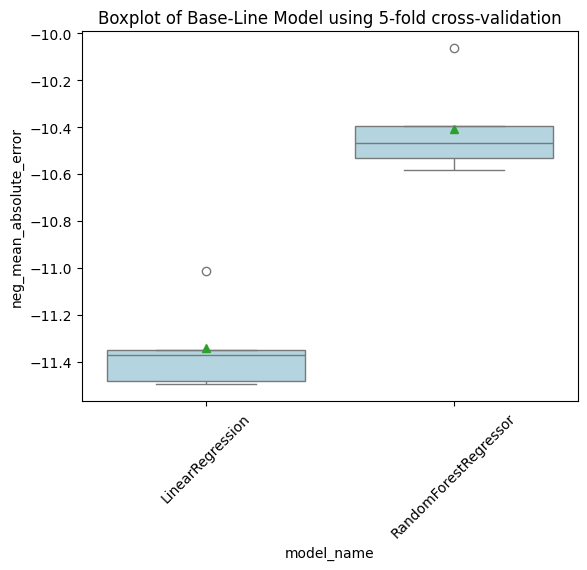

,mean,std
model_name,,
RandomForestRegressor,-10.408278,0.204647
LinearRegression,-11.341326,0.194667


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('model_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='mean', y='model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['model_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='std', y='model_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
generate_baseline_results(
    models,
    X_train,
    y_train,
    metrics="neg_mean_absolute_error",
    cv=5,
    plot_results=True,
)

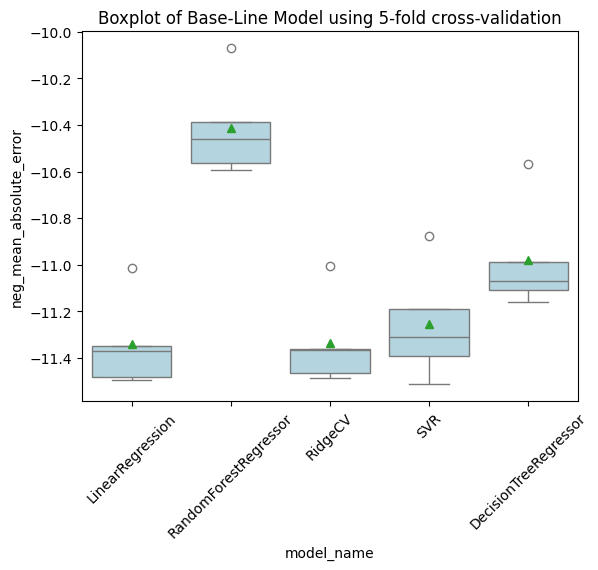

,mean,std
model_name,,
RandomForestRegressor,-10.415363,0.209032
DecisionTreeRegressor,-10.979345,0.237667
SVR,-11.255392,0.242697
RidgeCV,-11.336357,0.193292
LinearRegression,-11.341326,0.194667


from matplotlib import pyplot as plt
_df_8['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
generate_baseline_results(
    models,
    X_train,
    y_train,
    metrics="neg_mean_absolute_error",
    cv=5,
    plot_results=True,
)

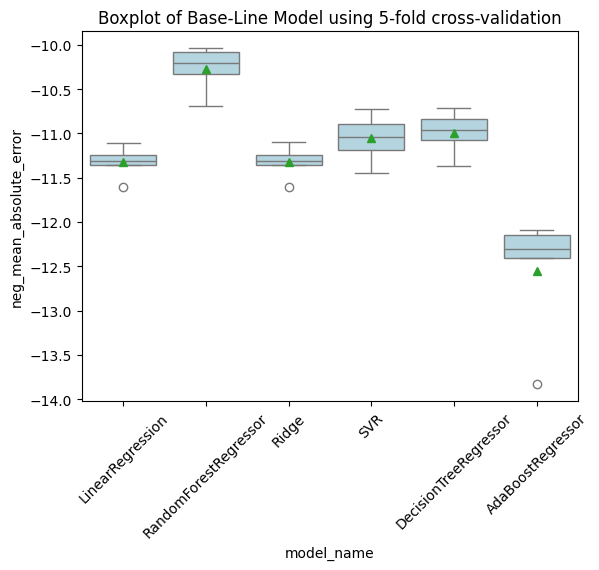

,mean,std
model_name,,
RandomForestRegressor,-10.267714,0.263685
DecisionTreeRegressor,-10.989565,0.252542
SVR,-11.045556,0.234793
Ridge,-11.322983,0.187678
LinearRegression,-11.324303,0.185893
AdaBoostRegressor,-12.555900,0.723367


In [ ]:
generate_baseline_results(
    models,
    X_train,
    y_train,
    metrics="neg_mean_absolute_error",
    cv=5,
    plot_results=True,
)

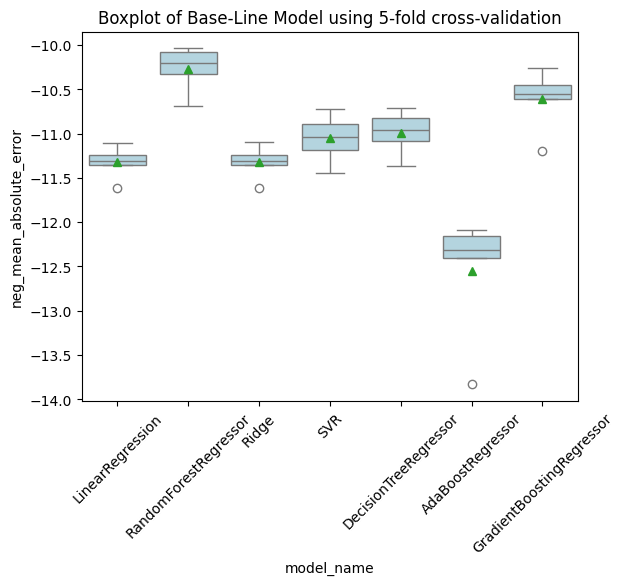

,mean,std
model_name,,
RandomForestRegressor,-10.267714,0.263685
GradientBoostingRegressor,-10.614215,0.351584
DecisionTreeRegressor,-10.988238,0.253569
SVR,-11.045556,0.234793
Ridge,-11.322983,0.187678
LinearRegression,-11.324303,0.185893
AdaBoostRegressor,-12.555900,0.723367


In [ ]:
generate_baseline_results(
    models,
    X_train,
    y_train,
    metrics="neg_mean_absolute_error",
    cv=5,
    plot_results=True,
)